In [8]:
import tensorflow as tf
import numpy as np

In [167]:

from __future__ import print_function
tf.reset_default_graph()

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 1000
batch_size = 1000
display_step = 1

# Network Parameters
n_hidden_1 = 784 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])
idf = tf.placeholder("float", [n_input])



# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_classes])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_classes])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes])),
    'r':tf.Variable(tf.random_normal([n_input, n_input]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_classes])),
    'b2': tf.Variable(tf.random_normal([n_classes])),
    'out': tf.Variable(tf.random_normal([n_classes])),
    'r':tf.Variable(tf.random_normal([n_input]))

}


# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    #layer_1 = tf.nn.sigmoid(layer_1)
    # Hidden layer with RELU activation
    #layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    #layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    #out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return layer_1






def rew(x, weights, biases):
    
    out_layer = tf.add(tf.matmul(x, weights['r']), biases['r'])

    return out_layer



reweight = rew(x, weights, biases)

loss_idf = tf.reduce_mean(tf.nn.l2_loss(reweight-idf))


xdash = tf.multiply(reweight,x)

# Construct model
pred = multilayer_perceptron(xdash, weights, biases)

# Define loss and optimizer
cst = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

cost = 1000000000*(cst)+0.0001*(loss_idf)

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Test model
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# Initializing the variables
init = tf.global_variables_initializer()



Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [168]:
train = []
test =[]

In [169]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        avg_l = 0.

        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c, l = sess.run([optimizer, cst, loss_idf], feed_dict={x: batch_x,
                                                          y: batch_y,
                                                          idf:np.ones(28*28)})
            # Compute average loss
            avg_cost += c / total_batch
            avg_l += l / total_batch

        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}" .format(avg_cost), "l=", \
                "{:.9f}" .format(avg_l))
            tracc = accuracy.eval({x: mnist.train.images, y: mnist.train.labels})
            teacc = accuracy.eval({x: mnist.test.images, y: mnist.test.labels})
            print("Accuracy:", tracc)
            print("Accuracy:", teacc)
            train.append(tracc)
        
            test.append(teacc)
    print("Optimization Finished!")


Epoch: 0001 cost= 76.442334331 l= 33742695.272727281
Accuracy: 0.443163
Accuracy: 0.456
Epoch: 0002 cost= 26.212063529 l= 32215315.090909101
Accuracy: 0.649473
Accuracy: 0.667
Epoch: 0003 cost= 15.762945869 l= 31469420.872727294
Accuracy: 0.732109
Accuracy: 0.7453
Epoch: 0004 cost= 11.683696053 l= 30858473.490909092
Accuracy: 0.780691
Accuracy: 0.7892
Epoch: 0005 cost= 9.423859952 l= 30325176.327272736
Accuracy: 0.811837
Accuracy: 0.8184
Epoch: 0006 cost= 7.966533921 l= 29856426.581818182
Accuracy: 0.8346
Accuracy: 0.8376
Epoch: 0007 cost= 6.927149859 l= 29433536.945454542
Accuracy: 0.8514
Accuracy: 0.851
Epoch: 0008 cost= 6.147846421 l= 29077163.018181819
Accuracy: 0.864782
Accuracy: 0.8632
Epoch: 0009 cost= 5.521311860 l= 28738688.290909093
Accuracy: 0.874928
Accuracy: 0.872
Epoch: 0010 cost= 5.003639793 l= 28413283.600000009
Accuracy: 0.882764
Accuracy: 0.8802
Epoch: 0011 cost= 4.571752661 l= 28131370.690909095
Accuracy: 0.889819
Accuracy: 0.8863
Epoch: 0012 cost= 4.196324574 l= 278

KeyboardInterrupt: 

In [170]:
multhi2 = (train, test)

(0, 200)

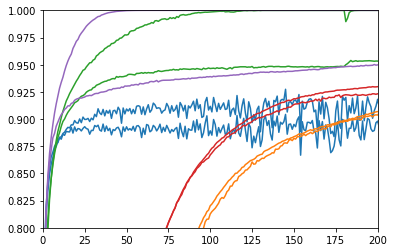

In [173]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(new[0],color='C0')
plt.plot(new[1], color='C0')

plt.plot(old[0],color='C1')
plt.plot(old[1], color='C1')

plt.plot(multhi[0],color='C2')
plt.plot(multhi[1], color='C2')

plt.plot(multeq[0],color='C3')
plt.plot(multeq[1], color='C3')


plt.plot(twolay[0],color='C4')
plt.plot(twolay[1], color='C4')

#plt.plot(multhi2[0],color='C5')
#plt.plot(multhi2[1], color='C5')

plt.yscale('linear')
plt.ylim(0.8,1)
#plt.grid(True)
plt.xlim(0,200)